# Vgg16 

In [59]:
from IPython.display import display, HTML

img_url = 'conv-layers-vgg16-1024x450.jpg'
display(HTML(f'<img src="{img_url}" alt="Image" style="width: 900px;">'))


In [29]:
from IPython.display import display, HTML

img_url = 'new41.jpg'
display(HTML(f'<img src="{img_url}" alt="Image" style="width: 600px;">'))

In [68]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [69]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [70]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

In [71]:
img_path = 'ricksh.jfif'
img = image.load_img(img_path, target_size = (224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [72]:
import cv2
img1 = cv2.imread(img_path)

# Check if the image was read correctly
if img1 is not None:
    # Display the image
    cv2.imshow('Image', img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Could not read the image.")

In [73]:
preds = model.predict(x)
print('Predict: ',decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 448ms/step
Predict:  [('n03417042', 'garbage_truck', 0.25526947), ('n03496892', 'harvester', 0.25370118), ('n03126707', 'crane', 0.09351739)]



# VGGNET With Keras on Custom Dataset

In [30]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
from keras.engine.topology import get_source_inputs


ImportError: cannot import name '_obtain_input_shape' from 'keras.applications.imagenet_utils' (C:\Users\ASIM\Anaconda3\lib\site-packages\keras\applications\imagenet_utils.py)

In [31]:
def VGGupdated(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model



In [32]:
model = VGGupdated(classes = 2) # bedroom and diningroom

In [33]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('car_dataset')

car_types = os.listdir('car_dataset')
print (car_types)  #what kinds of rooms are in this dataset

print("Types of cars found: ", len(dataset_path))



['audi', 'lamborghini']
Types of cars found:  2


In [37]:
cars = []

for item in car_types:
 # Get all the file names
 all_crs = os.listdir('car_dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for cr in all_crs:
    cars.append((item, str('car_dataset' + '/' +item) + '/' + cr))
    print(cars)



[('audi', 'car_dataset/audi/1.jpg')]
[('audi', 'car_dataset/audi/1.jpg'), ('audi', 'car_dataset/audi/10.jpg')]
[('audi', 'car_dataset/audi/1.jpg'), ('audi', 'car_dataset/audi/10.jpg'), ('audi', 'car_dataset/audi/11.jpg')]
[('audi', 'car_dataset/audi/1.jpg'), ('audi', 'car_dataset/audi/10.jpg'), ('audi', 'car_dataset/audi/11.jpg'), ('audi', 'car_dataset/audi/12.jpg')]
[('audi', 'car_dataset/audi/1.jpg'), ('audi', 'car_dataset/audi/10.jpg'), ('audi', 'car_dataset/audi/11.jpg'), ('audi', 'car_dataset/audi/12.jpg'), ('audi', 'car_dataset/audi/13.jpg')]
[('audi', 'car_dataset/audi/1.jpg'), ('audi', 'car_dataset/audi/10.jpg'), ('audi', 'car_dataset/audi/11.jpg'), ('audi', 'car_dataset/audi/12.jpg'), ('audi', 'car_dataset/audi/13.jpg'), ('audi', 'car_dataset/audi/14.jpg')]
[('audi', 'car_dataset/audi/1.jpg'), ('audi', 'car_dataset/audi/10.jpg'), ('audi', 'car_dataset/audi/11.jpg'), ('audi', 'car_dataset/audi/12.jpg'), ('audi', 'car_dataset/audi/13.jpg'), ('audi', 'car_dataset/audi/14.jpg'), (

In [39]:
    
# Build a dataframe        
car_df = pd.DataFrame(data=cars, columns=['car type', 'image'])
print(car_df.head(30))
#print(rooms_df.tail())


       car type                           image
0          audi          car_dataset/audi/1.jpg
1          audi         car_dataset/audi/10.jpg
2          audi         car_dataset/audi/11.jpg
3          audi         car_dataset/audi/12.jpg
4          audi         car_dataset/audi/13.jpg
5          audi         car_dataset/audi/14.jpg
6          audi         car_dataset/audi/15.jpg
7          audi         car_dataset/audi/16.jpg
8          audi         car_dataset/audi/17.jpg
9          audi         car_dataset/audi/18.jpg
10         audi         car_dataset/audi/19.jpg
11         audi          car_dataset/audi/2.jpg
12         audi         car_dataset/audi/20.jpg
13         audi          car_dataset/audi/3.jpg
14         audi          car_dataset/audi/4.jpg
15         audi          car_dataset/audi/5.jpg
16         audi          car_dataset/audi/6.jpg
17         audi          car_dataset/audi/7.jpg
18         audi          car_dataset/audi/8.jpg
19         audi          car_dataset/aud

In [42]:

# Let's check how many samples for each category are present
print("Total number of cars in the dataset: ", len(car_df))

car_count = car_df['car type'].value_counts()

print("cars in each category: ")
print(car_count)


Total number of cars in the dataset:  39
cars in each category: 
car type
audi           20
lamborghini    19
Name: count, dtype: int64


In [43]:


import cv2
path = 'car_dataset/'


im_size = 300

images = []
labels = []

for i in car_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [44]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape    


(39, 300, 300, 3)

In [45]:

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=car_df['car type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [48]:
'''
y=y.reshape(-1,1)
onehotencoder = OneHotEncoder(categorical_features=[0])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
Y= onehotencoder.fit_transform(y)
Y.shape  #(40, 2)
'''
#from sklearn.preprocessing import OneHotEncoder
#import numpy as np

# Reshape y to have a single feature
y = y.reshape(-1, 1)

# Create an instance of OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto', sparse=False)

# Fit and transform y
Y = onehotencoder.fit_transform(y)

print(Y.shape)  # Should output (40, 2) or similar shape based on your data


(39, 2)


C:\Users\ASIM\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [53]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.02, random_state=42)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(38, 300, 300, 3)
(38, 2)
(1, 300, 300, 3)
(1, 2)


In [54]:
model.fit(train_x, train_y, epochs = 5)  

Epoch 1/5
2/2 [==============================] - 133s 15s/step - loss: 0.6933 - accuracy: 0.5263
Epoch 2/5
2/2 [==============================] - 114s 12s/step - loss: 0.6965 - accuracy: 0.5263
Epoch 3/5
2/2 [==============================] - 92s 12s/step - loss: 0.6971 - accuracy: 0.5263
Epoch 4/5
2/2 [==============================] - 97s 14s/step - loss: 0.6929 - accuracy: 0.5263
Epoch 5/5
2/2 [==============================] - 103s 13s/step - loss: 0.6938 - accuracy: 0.5263


In [55]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
#print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 2s 2s/step - loss: 0.7773 - accuracy: 0.0000e+00
Loss = 0.777337372303009


# Take input from User and Classify that image

Input image shape: (1, 300, 300, 3)


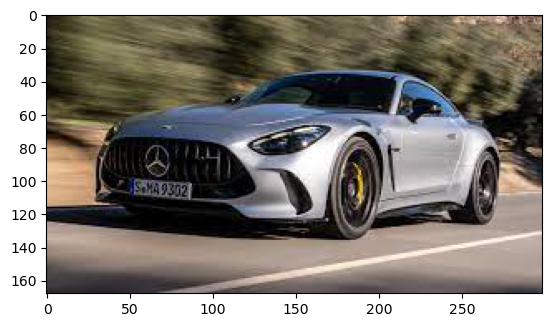

In [57]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image

img_path = 'download.jfif'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [58]:
print(model.predict(x))

1/1 [==============================] - 1s 634ms/step
[[0.55162406 0.44837597]]
